<a href="https://colab.research.google.com/github/costpetrides/Fluid-Dynamics-Navier-Stokes/blob/main/2D-Flow-Cylinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Lattice Boltzmann Method

Solving 2D Heat flow around square/circular cylinder

BKG Model
------------------------------------------------

Number of iterations:  10000
Flow Reynolds Number:  5 

Select the geometry: SQUARE CYLINDER or CIRCULAR CYLINDER: SQUARE CYLINDER


 Solving ...
------------------------------------------------


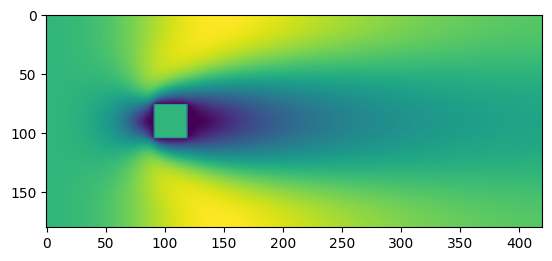

In [ ]:
#2D Flow around cylinder

#Lattice Boltzmann BKG Method

from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm

lineSingle = '------------------------------------------------'
lineDouble = '================================================'

print("\n")
print(lineDouble)
print("Lattice Boltzmann Method\n")
print("Solving 2D Heat flow around square/circular cylinder\n")
print("BKG Model")
print(lineSingle)

#flow defination

iterations = 10000       #total number of time iteration
print("\nNumber of iterations: ",iterations)

Re         = 5          #flow reynolds number
print("Flow Reynolds Number: ",Re,"\n")

nx, ny     = 420, 180    #number of lattice node
ly         = ny-1        #height of the domain

#creating shape of the obstacle: cylinder

cx, cy = nx//4, ny//2             #cylinder coordinates

geometry = ""
while not (geometry == 'SQUARE CYLINDER' or geometry == 'CIRCULAR CYLINDER'):

    geometry = input("Select the geometry: SQUARE CYLINDER or CIRCULAR CYLINDER: ").upper()

def obstacle_cylinder(x,y):

        if geometry == "CIRCULAR CYLINDER":
            r = ny//9                                #circle radius
            return (x-cx)**2 + (y-cy)**2<r**2
        elif geometry == "SQUARE CYLINDER":
            r = ny//6                                #side of square
            return abs((x-cx) + (y-cy)) + abs((x-cx) - (y-cy)) < r

obstacle = fromfunction(obstacle_cylinder, (nx,ny))        #forming the obstacle

if geometry == "CIRCULAR CYLINDER":
    r = ny//9                                #circle radius
elif geometry == "SQUARE CYLINDER":
    r = ny//6                                #side of square

in_velocity = 0.04                #inflow velocity
nu          = in_velocity*r/Re;   #fluid viscoisty
omega       = 1 / (3*nu + 0.5);   #relaxatation parameter


#defining lattice constants

v = array([ [1,1], [1,0], [1,-1], [0,1], [0,0], [0,-1], [-1,1], [-1,0], [-1,-1] ])

t = array([ 1/36, 1/9, 1/36, 1/9, 4/9, 1/9, 1/36, 1/9, 1/36])

col1 = array([0, 1, 2])
col2 = array([3, 4, 5])
col3 = array([6, 7, 8])

#defining macroscopic flow variable

def macroscopic(fin):
    rho = sum(fin, axis = 0)                     #calculating density
    u = zeros((2,nx,ny))                         #calculating velocities
    for i in range(9):
        u[0,:,:] += v[i,0]*fin[i,:,:]
        u[1,:,:] += v[i,1]*fin[i,:,:]
    u /= rho
    return rho, u

# Equilibrium distribution function.

def equilibrium(rho,u):
    usqr = 3/2 * (u[0]**2 + u[1]**2)
    eq = zeros((9,nx,ny))
    for i in range(9):
        cu = 3*(v[i,0]*u[0,:,:] + v[i,1]*u[1,:,:])
        eq[i:,:] = rho*t[i]*(1 + cu + 0.5*cu**2 - usqr)
    return eq

# Initial velocity field: almost zero, with a slight perturbation to trigger the instability.

def init_vel(d,x,y):
    return (1-d) * in_velocity * (1 + 1e-4*sin(y/ly*2*pi))

vel = fromfunction(init_vel, (2,nx,ny))

# Initialization of the populations at equilibrium with the given velocity.

fin = equilibrium(1, vel)

print("\n")
print(lineDouble)
print(' Solving ...')
print(lineSingle)

#Time Loop

for time in range(iterations):

    fin[col3,-1,:] = fin[col3,-2,:]        #outflow BC

    rho, u = macroscopic(fin)              #compute velocity & density

    u[:,0,:] = vel[:,0,:]                  #inflow BC
    rho[0,:] = 1/(1-u[0,0,:])*(sum(fin[col2,0,:],axis=0) + 2*(sum(fin[col3,0,:],axis=0)))

    #compute the population & equilibrium
    feq = equilibrium(rho,u)
    fin[[0,1,2],0,:] = feq[[0,1,2],0,:] + fin[[8,7,6],0,:] - feq[[8,7,6],0,:]

    #collision Step

    fout = fin - omega * (fin - feq)

    #No slip/Bounce Back Condition for the cylinder wall

    for i in range(9):
        fout[i,obstacle] = fin[8-i,obstacle]

    #Streaming Step

    for i in range(9):
        fin[i,:,:] = roll(roll(fout[i,:,:], v[i,0], axis=0), v[i,1], axis=1)

    #Visualization of the velocity field

    if (time%100==0):
        plt.clf()
        plt.imshow(sqrt(u[0]**2+u[1]**2).transpose(), cmap=cm.viridis)
        plt.savefig("vel.{0:04d}.png".format(time//100),dpi=600)

In [2]:
pip install imageio



Lattice Boltzmann Method

Solving 2D Heat flow around square/circular cylinder

BKG Model
------------------------------------------------

Number of iterations:  10000
Flow Reynolds Number:  5 

Select the geometry: SQUARE CYLINDER or CIRCULAR CYLINDER: SQUARE CYLINDER


 Solving ...
------------------------------------------------


<ipython-input-4-37956ff158d7>:129: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))


GIF created: flow_evolution.gif


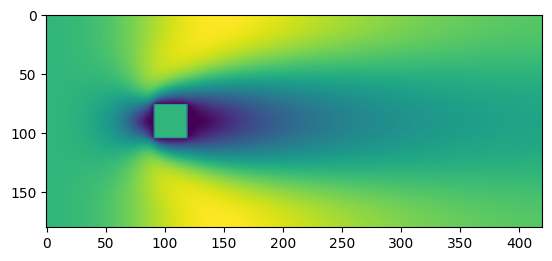

In [4]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm
import imageio
import io

lineSingle = '------------------------------------------------'
lineDouble = '================================================'

print("\n")
print(lineDouble)
print("Lattice Boltzmann Method\n")
print("Solving 2D Heat flow around square/circular cylinder\n")
print("BKG Model")
print(lineSingle)

# Flow definition
iterations = 10000       # Total number of time iterations
print("\nNumber of iterations: ", iterations)

Re = 5          # Flow Reynolds Number
print("Flow Reynolds Number: ", Re, "\n")

nx, ny = 420, 180    # Number of lattice nodes
ly = ny-1        # Height of the domain

# Creating shape of the obstacle: cylinder
cx, cy = nx//4, ny//2             # Cylinder coordinates

geometry = ""
while not (geometry == 'SQUARE CYLINDER' or geometry == 'CIRCULAR CYLINDER'):
    geometry = input("Select the geometry: SQUARE CYLINDER or CIRCULAR CYLINDER: ").upper()

def obstacle_cylinder(x, y):
    if geometry == "CIRCULAR CYLINDER":
        r = ny//9                                # Circle radius
        return (x-cx)**2 + (y-cy)**2 < r**2
    elif geometry == "SQUARE CYLINDER":
        r = ny//6                                # Side of square
        return abs((x-cx) + (y-cy)) + abs((x-cx) - (y-cy)) < r

obstacle = fromfunction(obstacle_cylinder, (nx, ny))        # Forming the obstacle

if geometry == "CIRCULAR CYLINDER":
    r = ny//9                                # Circle radius
elif geometry == "SQUARE CYLINDER":
    r = ny//6                                # Side of square

in_velocity = 0.04                # Inflow velocity
nu = in_velocity * r / Re;   # Fluid viscosity
omega = 1 / (3 * nu + 0.5);   # Relaxation parameter

# Defining lattice constants
v = array([[1, 1], [1, 0], [1, -1], [0, 1], [0, 0], [0, -1], [-1, 1], [-1, 0], [-1, -1]])
t = array([1/36, 1/9, 1/36, 1/9, 4/9, 1/9, 1/36, 1/9, 1/36])
col1 = array([0, 1, 2])
col2 = array([3, 4, 5])
col3 = array([6, 7, 8])

# Defining macroscopic flow variable
def macroscopic(fin):
    rho = sum(fin, axis=0)                     # Calculating density
    u = zeros((2, nx, ny))                         # Calculating velocities
    for i in range(9):
        u[0, :, :] += v[i, 0] * fin[i, :, :]
        u[1, :, :] += v[i, 1] * fin[i, :, :]
    u /= rho
    return rho, u

# Equilibrium distribution function
def equilibrium(rho, u):
    usqr = 3/2 * (u[0]**2 + u[1]**2)
    eq = zeros((9, nx, ny))
    for i in range(9):
        cu = 3 * (v[i, 0] * u[0, :, :] + v[i, 1] * u[1, :, :])
        eq[i:, :] = rho * t[i] * (1 + cu + 0.5 * cu**2 - usqr)
    return eq

# Initial velocity field: almost zero, with a slight perturbation to trigger the instability
def init_vel(d, x, y):
    return (1-d) * in_velocity * (1 + 1e-4 * sin(y/ly * 2 * pi))

vel = fromfunction(init_vel, (2, nx, ny))

# Initialization of the populations at equilibrium with the given velocity
fin = equilibrium(1, vel)

print("\n")
print(lineDouble)
print(' Solving ...')
print(lineSingle)

# Prepare to create GIF in memory
images = []

# Time Loop
for time in range(iterations):
    fin[col3, -1, :] = fin[col3, -2, :]        # Outflow BC

    rho, u = macroscopic(fin)              # Compute velocity & density

    u[:, 0, :] = vel[:, 0, :]                  # Inflow BC
    rho[0, :] = 1/(1-u[0, 0, :]) * (sum(fin[col2, 0, :], axis=0) + 2 * (sum(fin[col3, 0, :], axis=0)))

    # Compute the population & equilibrium
    feq = equilibrium(rho, u)
    fin[[0, 1, 2], 0, :] = feq[[0, 1, 2], 0, :] + fin[[8, 7, 6], 0, :] - feq[[8, 7, 6], 0, :]

    # Collision Step
    fout = fin - omega * (fin - feq)

    # No slip/Bounce Back Condition for the cylinder wall
    for i in range(9):
        fout[i, obstacle] = fin[8-i, obstacle]

    # Streaming Step
    for i in range(9):
        fin[i, :, :] = roll(roll(fout[i, :, :], v[i, 0], axis=0), v[i, 1], axis=1)

    # Visualization of the velocity field
    if (time % 100 == 0):
        plt.clf()
        plt.imshow(sqrt(u[0]**2 + u[1]**2).transpose(), cmap=cm.viridis)

        # Save to a buffer instead of a file
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=600)
        buf.seek(0)
        images.append(imageio.imread(buf))
        buf.close()

# Create GIF from saved images
imageio.mimsave('flow_evolution.gif', images, duration=0.1)

print("GIF created: flow_evolution.gif")